# Langgraph4j to PlantUML diagram

In [1]:
var userHomeDir = System.getProperty("user.home");
var localRespoUrl = "file://" + userHomeDir + "/.m2/repository/";
var langgraph4jVersion = "1.6-SNAPSHOT";

In [2]:
%%bash 
rm -rf \{userHomeDir}/Library/Jupyter/kernels/rapaio-jupyter-kernel/mima_cache/org/bsc/langgraph4j

In [ ]:
%dependency /add-repo local \{localRespoUrl} release|never snapshot|always
// %dependency /list-repos
%dependency /add org.slf4j:slf4j-jdk14:2.0.9
%dependency /add org.bsc.langgraph4j:langgraph4j-core:\{langgraph4jVersion}
%dependency /add net.sourceforge.plantuml:plantuml-mit:1.2025.3

%dependency /resolve

**Utility to render graph respresentation in PlantUML**

In [10]:
import net.sourceforge.plantuml.SourceStringReader;
import net.sourceforge.plantuml.FileFormatOption;
import net.sourceforge.plantuml.FileFormat;
import org.bsc.langgraph4j.GraphRepresentation;

void displayDiagram( String diagram ) throws IOException { 
    
    var reader = new SourceStringReader(diagram);

    try(var imageOutStream = new java.io.ByteArrayOutputStream()) {

        var description = reader.outputImage( imageOutStream, 0, new FileFormatOption(FileFormat.PNG));

        var imageInStream = new java.io.ByteArrayInputStream(  imageOutStream.toByteArray() );

        var image = javax.imageio.ImageIO.read( imageInStream );

        display(  image );

    }
}

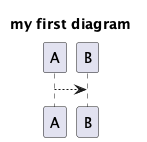

In [5]:

var code = """
        @startuml
        title my first diagram
        A --> B
        @enduml
        """;

displayDiagram( code );


## Langgraph4j workflow to PlantUML diagram

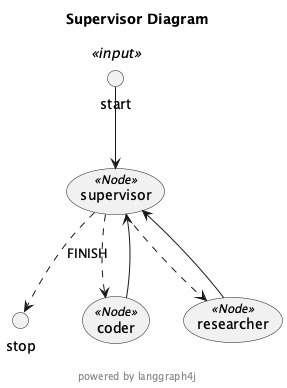

In [11]:
import org.bsc.langgraph4j.StateGraph;
import org.bsc.langgraph4j.state.AgentState;
import org.bsc.langgraph4j.utils.EdgeMappings;
import static org.bsc.langgraph4j.StateGraph.END;
import static org.bsc.langgraph4j.StateGraph.START;
import static org.bsc.langgraph4j.action.AsyncEdgeAction.edge_async;
import static org.bsc.langgraph4j.action.AsyncNodeAction.node_async;
import java.util.Map;


var workflow = new StateGraph<>( AgentState::new )
        .addNode( "supervisor", node_async(state -> Map.of()))
        .addNode( "coder", node_async(state -> Map.of()) )
        .addNode( "researcher",node_async(state -> Map.of()) )
        .addEdge( START, "supervisor")
        .addConditionalEdges( "supervisor",
                edge_async( state -> "FINISH" ), 
                EdgeMappings.builder()
                        .to( "coder" )
                        .to( "researcher")
                        .toEND( "FINISH")
                        .build())
        .addEdge( "coder", "supervisor")
        .addEdge( "researcher", "supervisor")
        ;

displayDiagram( workflow.getGraph( GraphRepresentation.Type.PLANTUML, "Supervisor Diagram", false ).content() );
